# Final Project Submission

Please fill out:
* Student name: Kristin Cooper
* Student pace: Full Time
* Scheduled project review date/time: TBD
* Instructor name: James Irving
* Blog post URL: TBD


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh') #try also seaborn-darkgrid, fivethirtyeight
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import statsmodels
import math

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

color_sequence = px.colors.sequential.dense[1:]

# Obtain

* Understanding stakeholder requirements
    * King County homeowner interested in renovating their house in order to increase resale value
* Gathering information on the problem
* Sourcing data that we think will be necessary for solving this problem

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
display(df.info())
display(df.head())
display(round(df.describe(),3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

None

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

id        price   bedrooms  bathrooms  sqft_living  \
count  2.159700e+04    21597.000  21597.000  21597.000    21597.000   
mean   4.580474e+09   540296.574      3.373      2.116     2080.322   
std    2.876736e+09   367368.140      0.926      0.769      918.106   
min    1.000102e+06    78000.000      1.000      0.500      370.000   
25%    2.123049e+09   322000.000      3.000      1.750     1430.000   
50%    3.904930e+09   450000.000      3.000      2.250     1910.000   
75%    7.308900e+09   645000.000      4.000      2.500     2550.000   
max    9.900000e+09  7700000.000     33.000      8.000    13540.000   

          sqft_lot     floors  waterfront       view  condition      grade  \
count    21597.000  21597.000   19221.000  21534.000  21597.000  21597.000   
mean     15099.409      1.494       0.008      0.234      3.410      7.658   
std      41412.637      0.540       0.087      0.766      0.651      1.173   
min        520.000      1.000       0.000      0.000      1.000      3.000   
25%       5040.000      1.000       0.000      0.000      3.000      7.000   
50%       7618.000      1.500       0.000      0.000      3.000      7.000   
75%      10685.000      2.000       0.000      0.000      4.000      8.000   
max    1651359.000      3.500       1.000      4.000      5.000     13.000   

       sqft_above   yr_built  yr_renovated    zipcode        lat       long  \
count   21597.000  21597.000     17755.000  21597.000  21597.000  21597.000   
mean     1788.597   1971.000        83.637  98077.952     47.560   -122.214   
std       827.760     29.375       399.946     53.513      0.139      0.141   
min       370.000   1900.000         0.000  98001.000     47.156   -122.519   
25%      1190.000   1951.000         0.000  98033.000     47.471   -122.328   
50%      1560.000   1975.000         0.000  98065.000     47.572   -122.231   
75%      2210.000   1997.000         0.000  98118.000     47.678   -122.125   
max      9410.000   2015.000      2015.000  98199.000     47.778   -121.315   

       sqft_living15  sqft_lot15  
count       21597.00   21597.000  
mean         1986.62   12758.284  
std           685.23   27274.442  
min           399.00     651.000  
25%          1490.00    5100.000  
50%          1840.00    7620.000  
75%          2360.00   10083.000  
max          6210.00  871200.000

# Scrub

Checklist:
1. Rename columns to be more intuitive
1. Feature engineering
1. Deal with data types
1. Removed null values
1. Deal with outliers

***
* Normalizing data (z-score)

In [3]:
# Rename columns to be more intuitive
df.rename(mapper={'date': 'date_sold', 
                  'sqft_living15': 'neighboring_sqft_living',
                  'sqft_lot15': 'neighboring_sqft_lot'}, axis=1, inplace=True)

In [4]:
# Create a column for Year Sold in order to calculate Age At Sale
df['year_sold'] = df['date_sold'].apply(lambda x: int(x[-4:]))
df['age_at_sale'] = df['year_sold'] - df['yr_built']

# Create a categorical column to indicate if a house was renovated or not
df['renovated?'] = np.where(df['yr_renovated']>0, 'Yes', 'No')
df.head()

df.head()

id   date_sold     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  zipcode  \
0      5650     1.0         NaN   0.0  ...      1955           0.0    98178   
1      7242     2.0         0.0   0.0  ...      1951        1991.0    98125   
2     10000     1.0         0.0   0.0  ...      1933           NaN    98028   
3      5000     1.0         0.0   0.0  ...      1965           0.0    98136   
4      8080     1.0         0.0   0.0  ...      1987           0.0    98074   

       lat     long  neighboring_sqft_living  neighboring_sqft_lot  year_sold  \
0  47.5112 -122.257                     1340                  5650       2014   
1  47.7210 -122.319                     1690                  7639       2014   
2  47.7379 -122.233                     2720                  8062       2015   
3  47.5208 -122.393                     1360                  5000       2014   
4  47.6168 -122.045                     1800                  7503       2015   

   age_at_sale  renovated?  
0           59          No  
1           63         Yes  
2           82          No  
3           49          No  
4           28          No  

[5 rows x 24 columns]

In [5]:
# Create a column for Years Since Renovated for houses that have indeed been renovated
df_renovated = df.loc[df['renovated?'] == 'Yes']
df_renovated['yrs_since_renovated'] = df_renovated['year_sold'] - df_renovated['yr_renovated']
df['yrs_since_renovated'] = df_renovated['yrs_since_renovated']
df

<ipython-input-5-6d07e190143d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_renovated['yrs_since_renovated'] = df_renovated['year_sold'] - df_renovated['yr_renovated']


id   date_sold     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode  \
0          5650     1.0         NaN   0.0  ...           0.0    98178   
1          7242     2.0         0.0   0.0  ...        1991.0    98125   
2         10000     1.0         0.0   0.0  ...           NaN    98028   
3          5000     1.0         0.0   0.0  ...           0.0    98136   
4          8080     1.0         0.0   0.0  ...           0.0    98074   
...         ...     ...         ...   ...  ...           ...      ...   
21592      1131     3.0         0.0   0.0  ...           0.0    98103   
21593      5813     2.0         0.0   0.0  ...           0.0    98146   
21594      1350     2.0         0.0   0.0  ...           0.0    98144   
21595      2388     2.0         NaN   0.0  ...           0.0    98027   
21596      1076     2.0         0.0   0.0  ...           0.0    98144   

           lat     long  neighboring_sqft_living  neighboring_sqft_lot  \
0      47.5112 -122.257                     1340                  5650   
1      47.7210 -122.319                     1690                  7639   
2      47.7379 -122.233                     2720                  8062   
3      47.5208 -122.393                     1360                  5000   
4      47.6168 -122.045                     1800                  7503   
...        ...      ...                      ...                   ...   
21592  47.6993 -122.346                     1530                  1509   
21593  47.5107 -122.362                     1830                  7200   
21594  47.5944 -122.299                     1020                  2007   
21595  47.5345 -122.069                     1410                  1287   
21596  47.5941 -122.299                     1020                  1357   

       year_sold  age_at_sale  renovated?  yrs_since_renovated  
0           2014           59          No                  NaN  
1           2014           63         Yes                 23.0  
2           2015           82          No                  NaN  
3           2014           49          No                  NaN  
4           2015           28          No                  NaN  
...          ...          ...         ...                  ...  
21592       2014            5          No                  NaN  
21593       2015            1          No                  NaN  
21594       2014            5          No                  NaN  
21595       2015           11          No                  NaN  
21596       2014            6          No                  NaN  

[21597 rows x 25 columns]

In [6]:
# Converted date_sold column into datetime datatype to enable sorting
df['date_sold'] = pd.to_datetime(df['date_sold'])

# Converted zipcode into object so it isn't calculated mathematically
df['zipcode'].astype(object)

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21597, dtype: object

In [7]:
# Found "?" value in sqft_basement column, keeping it from being stored as a float.
# reviewed the rows with "?" value, decided to replace the ? with nan for now and deal later
df.loc[df['sqft_basement']=='?'].drop(columns=['id', 'waterfront', 'neighboring_sqft_living', 
                                               'neighboring_sqft_lot', 'year_sold', 
                                               'age_at_sale','yrs_since_renovated'])
df['sqft_basement'].replace(to_replace='?', value=np.nan, inplace=True)
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [8]:
display(df.info())
display(df.describe())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       21597 non-null  int64         
 1   date_sold                21597 non-null  datetime64[ns]
 2   price                    21597 non-null  float64       
 3   bedrooms                 21597 non-null  int64         
 4   bathrooms                21597 non-null  float64       
 5   sqft_living              21597 non-null  int64         
 6   sqft_lot                 21597 non-null  int64         
 7   floors                   21597 non-null  float64       
 8   waterfront               19221 non-null  float64       
 9   view                     21534 non-null  float64       
 10  condition                21597 non-null  int64         
 11  grade                    21597 non-null  int64         
 12  sqft_above               21597 n

None

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

       ...      yr_built  yr_renovated       zipcode           lat  \
count  ...  21597.000000  17755.000000  21597.000000  21597.000000   
mean   ...   1970.999676     83.636778  98077.951845     47.560093   
std    ...     29.375234    399.946414     53.513072      0.138552   
min    ...   1900.000000      0.000000  98001.000000     47.155900   
25%    ...   1951.000000      0.000000  98033.000000     47.471100   
50%    ...   1975.000000      0.000000  98065.000000     47.571800   
75%    ...   1997.000000      0.000000  98118.000000     47.678000   
max    ...   2015.000000   2015.000000  98199.000000     47.777600   

               long  neighboring_sqft_living  neighboring_sqft_lot  \
count  21597.000000             21597.000000          21597.000000   
mean    -122.213982              1986.620318          12758.283512   
std        0.140724               685.230472          27274.441950   
min     -122.519000               399.000000            651.000000   
25%     -122.328000              1490.000000           5100.000000   
50%     -122.231000              1840.000000           7620.000000   
75%     -122.125000              2360.000000          10083.000000   
max     -121.315000              6210.000000         871200.000000   

          year_sold   age_at_sale  yrs_since_renovated  
count  21597.000000  21597.000000           744.000000  
mean    2014.322962     43.323286            18.345430  
std        0.467619     29.377285            15.610683  
min     2014.000000     -1.000000            -1.000000  
25%     2014.000000     18.000000             7.000000  
50%     2014.000000     40.000000            15.000000  
75%     2015.000000     63.000000            27.000000  
max     2015.000000    115.000000            80.000000  

[8 rows x 23 columns]

id  date_sold     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode      lat  \
0      5650     1.0         NaN   0.0  ...           0.0    98178  47.5112   
1      7242     2.0         0.0   0.0  ...        1991.0    98125  47.7210   
2     10000     1.0         0.0   0.0  ...           NaN    98028  47.7379   
3      5000     1.0         0.0   0.0  ...           0.0    98136  47.5208   
4      8080     1.0         0.0   0.0  ...           0.0    98074  47.6168   

      long  neighboring_sqft_living  neighboring_sqft_lot  year_sold  \
0 -122.257                     1340                  5650       2014   
1 -122.319                     1690                  7639       2014   
2 -122.233                     2720                  8062       2015   
3 -122.393                     1360                  5000       2014   
4 -122.045                     1800                  7503       2015   

   age_at_sale  renovated?  yrs_since_renovated  
0           59          No                  NaN  
1           63         Yes                 23.0  
2           82          No                  NaN  
3           49          No                  NaN  
4           28          No                  NaN  

[5 rows x 25 columns]

In [9]:
# Look for null values, found in columns: waterfront, view, sqft_basement, yr_renovated, yrs_since_renovated
df.isna().any() 

id                         False
date_sold                  False
price                      False
bedrooms                   False
bathrooms                  False
sqft_living                False
sqft_lot                   False
floors                     False
waterfront                  True
view                        True
condition                  False
grade                      False
sqft_above                 False
sqft_basement               True
yr_built                   False
yr_renovated                True
zipcode                    False
lat                        False
long                       False
neighboring_sqft_living    False
neighboring_sqft_lot       False
year_sold                  False
age_at_sale                False
renovated?                 False
yrs_since_renovated         True
dtype: bool

In [10]:
# Fix waterfront null values - vast majority of houses are not waterfront, so assuming null = No
df['waterfront'].fillna('No', inplace=True)
df['waterfront'].replace(to_replace=0, value='No', inplace=True)
df['waterfront'].replace(to_replace=1, value='Yes', inplace=True)

# Fix view null values - discrete categorical column, so created an "unknown" category
df['view'].fillna('unknown', inplace=True)

# Fix yr_renovated null values - continuous numeric column, so selected an ultra low dummy value
df['yr_renovated'].unique()
df['yr_renovated'].fillna(0, inplace=True)

# Fix yrs_since_renovated null values - continuous numeric column, so selected an ultra high dummy value
df['yrs_since_renovated'].fillna(9999, inplace=True)

# Fix sqft_basement null values - after some exploration, decided to fill with 0
df['sqft_basement'].fillna(0, inplace=True)

<h4>Continuous Columns with Definitions</h4>

* **id** - unique identifier for a house (not a predictor)
* **date_sold** - when house was sold
* **price** - price of home
* **sqft_living** - square footage of the home
* **sqft_lot** - square footage of the lot
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **neighboring_sqft_living** - The square footage of interior housing living space for the nearest 15 neighbors
* **neighboring_sqft_lot** - The square footage of the land lots of the nearest 15 neighbors
* **yr_sold** - extrapolated from date_sold column
* **age_at_sale** - calculated by the yr_sold minus yr_built
* **yrs_since_renovation** - calculated by yr_sold minus yr_renovated


<h4>Categorical Columns with Definitions</h4>

<i>Source: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r</i>

* **zipcode** - zipcode where home is located
* **bedrooms** - Number of bedrooms (1-11 in this sample)
* **bathrooms** - Number of bathrooms (0.50-8.00 in this sample)
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront (True, False, or unknown)
* **grade** - Represents the construction quality of improvements. Grades run from grade 1 (below minimum builting standards) to 13 (custom-designed mansion). 1-5 do not meet building code. Additional detail below. 
* **condition** - Coded 1 (poor) - 5 (very good) relative to age and grade. Additional detail below.
* **renovated?** - boolean value if the house was renovated or not, as determined by yrs_renovated > 0

<h4>Grade & Condition Category Details</h4>


<details>
    <summary><i>click here to expand</i></summary>
  
    Grade details:
    * 1-3 Falls short of minimum building standards. Normally cabin or inferior structure.
    * 4 Generally older, low quality construction. Does not meet code.
    * 5 Low construction costs and workmanship. Small, simple design.
    * 6 Lowest grade currently meeting building code. Low quality materials and simple designs.
    * 7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.
    * 8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
    * 9 Better architectural design with extra interior and exterior design and quality.
    * 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
    * 11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
    * 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
    * 13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 

    Condition details:
    * 1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.
    * 2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.
    * 3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.
    * 4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.
    * 5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.
    
</details> 

In [11]:
predictors_cat = ['floors', 'waterfront', 'condition', 'bedrooms', 'bathrooms', 'grade', 
                  'condition', 'renovated?', 'zipcode']
predictors_contin = ['sqft_living', 'sqft_lot',
                     'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
                     'neighboring_sqft_living', 'neighboring_sqft_lot',
                     'age_at_sale', 'yrs_since_renovated']
predictors = predictors_cat + predictors_contin
target = 'price'

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

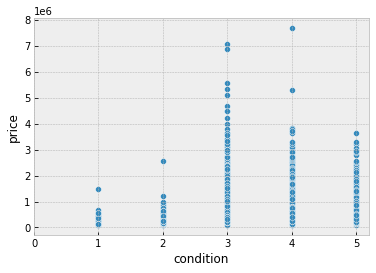

In [12]:
# Explore condition values
display(df['condition'].value_counts())
sns.scatterplot(data=df, x='condition', y='price')
plt.xticks(ticks=range(6))
plt.show();

In [13]:
# Change condition category to poor, average, and excellent to avoid multicollinearity 
df['condition'].replace(to_replace=[1, 2], value='Poor', inplace=True)
df['condition'].replace(to_replace=[3, 4], value='Average', inplace=True)
df['condition'].replace(to_replace=5, value='Excellent', inplace=True)
df['condition']

0          Average
1          Average
2          Average
3        Excellent
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: object

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

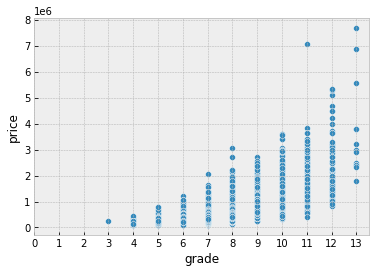

In [14]:
# Explore grade values
display(df['grade'].value_counts())
sns.scatterplot(data=df, x='grade', y='price', )
plt.xticks(ticks=range(14))
plt.show();

In [15]:
# Ensure all categorical columns are stored as strings
for pred in predictors_cat:
    df[pred] = df[pred].astype(object)
df['id'] = df['id'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       21597 non-null  object        
 1   date_sold                21597 non-null  datetime64[ns]
 2   price                    21597 non-null  float64       
 3   bedrooms                 21597 non-null  object        
 4   bathrooms                21597 non-null  object        
 5   sqft_living              21597 non-null  int64         
 6   sqft_lot                 21597 non-null  int64         
 7   floors                   21597 non-null  object        
 8   waterfront               21597 non-null  object        
 9   view                     21597 non-null  object        
 10  condition                21597 non-null  object        
 11  grade                    21597 non-null  object        
 12  sqft_above               21597 n

In [16]:
# Remove bedroom outlier
df = df[df['bedrooms'] <= 11]

In [17]:
for pred in predictors_cat:
    df[pred] = df[pred].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       21596 non-null  object        
 1   date_sold                21596 non-null  datetime64[ns]
 2   price                    21596 non-null  float64       
 3   bedrooms                 21596 non-null  category      
 4   bathrooms                21596 non-null  category      
 5   sqft_living              21596 non-null  int64         
 6   sqft_lot                 21596 non-null  int64         
 7   floors                   21596 non-null  category      
 8   waterfront               21596 non-null  category      
 9   view                     21596 non-null  object        
 10  condition                21596 non-null  category      
 11  grade                    21596 non-null  category      
 12  sqft_above               21596 n

<ipython-input-17-13768c2ca150>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[pred] = df[pred].astype('category')


In [18]:
ohe = pd.get_dummies(df[predictors_cat], prefix=predictors_cat, drop_first=True) 
df_ohe = pd.concat([df.drop(columns=predictors_cat), ohe], axis=1)
display(df_ohe.head())
display(df_ohe.info())

id  date_sold     price  sqft_living  sqft_lot view  sqft_above  \
0  7129300520 2014-10-13  221900.0         1180      5650    0        1180   
1  6414100192 2014-12-09  538000.0         2570      7242    0        2170   
2  5631500400 2015-02-25  180000.0          770     10000    0         770   
3  2487200875 2014-12-09  604000.0         1960      5000    0        1050   
4  1954400510 2015-02-18  510000.0         1680      8080    0        1680   

   sqft_basement  yr_built  yr_renovated  ...  zipcode_98146  zipcode_98148  \
0            0.0      1955           0.0  ...              0              0   
1          400.0      1951        1991.0  ...              0              0   
2            0.0      1933           0.0  ...              0              0   
3          910.0      1965           0.0  ...              0              0   
4            0.0      1987           0.0  ...              0              0   

   zipcode_98155  zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode_98188  zipcode_98198  zipcode_98199  
0              0              0              0  
1              0              0              0  
2              0              0              0  
3              0              0              0  
4              0              0              0  

[5 rows x 145 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Columns: 145 entries, id to zipcode_98199
dtypes: datetime64[ns](1), float64(6), int64(8), object(2), uint8(128)
memory usage: 5.6+ MB


None

# Explore

* Create visualizations
* Check for collinearity
* Check that dataset meets linear regression assumptions
* After initial exploration, one-hot encode categorical data


In [19]:
zipcodes_df = df.groupby('zipcode').mean().reset_index().drop(columns=['neighboring_sqft_living', 
                                                  'neighboring_sqft_lot', 'year_sold',
                                                 'age_at_sale', 'yrs_since_renovated', 'yr_renovated'])
int_cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']
zipcodes_df[int_cols] = zipcodes_df[int_cols].astype(int)
zipcodes_df

zipcode    price  sqft_living  sqft_lot  sqft_above  sqft_basement  \
0    98001   281194         1903     14967        1723            180   
1    98002   234284         1627      7517        1522            105   
2    98003   294111         1928     10603        1663            259   
3    98004  1356523         2909     13104        2419            489   
4    98005   810289         2656     19928        2160            485   
..     ...      ...          ...       ...         ...            ...   
65   98177   676419         2323     11904        1836            473   
66   98178   310612         1729      8309        1325            396   
67   98188   289078         1802     10126        1492            301   
68   98198   302896         1745     10525        1476            261   
69   98199   792187         2161      5436        1591            564   

    yr_built        lat        long  
0       1980  47.309106 -122.270704  
1       1967  47.308780 -122.213357  
2       1976  47.315741 -122.310054  
3       1971  47.616183 -122.205189  
4       1969  47.611532 -122.167268  
..       ...        ...         ...  
65      1960  47.742381 -122.369282  
66      1955  47.499118 -122.246969  
67      1965  47.447310 -122.280993  
68      1966  47.390788 -122.315743  
69      1956  47.648098 -122.398461  

[70 rows x 9 columns]

In [20]:
# code source: https://towardsdatascience.com/visualizing-data-at-the-zip-code-level-with-folium-d07ac983db20
# geojson file source: https://data.seattle.gov/dataset/Zip-Codes/dk58-w4ct
import json
with open('data/kc_zipcode_map.geojson', 'r') as jsonFile:
    kczipcodes = json.load(jsonFile)
zipmap = kczipcodes

geozips = []
for i in range(len(zipmap['features'])):
    if zipmap['features'][i]['properties']['ZIP'] in list(df['zipcode'].unique()):
        geozips.append(zipmap['features'][i])

new_json = dict.fromkeys(['type', 'features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geozips

open('data/updated_kc_zipcode_map.json', 'w').write(
        json.dumps(new_json, sort_keys=True, indent=4, separators=(',', ': ')));

In [21]:
import folium

def create_map(data, zips, mapped_feature, add_text=''):
    """
    table = pd.DataFrame, main dataset to read from
    zips = string, column name where zipcodes are
    mapped_feature = string, column name for feature to visualize
    """
    
    kc_geo = r'data/updated_kc_zipcode_map.json'
    m = folium.Map(location = [47.47, -121.84], zoom_start=9)
    folium.Choropleth(geo_data=kc_geo, data=data, key_on='feature.properties.ZIP', highlight=True,
                columns=[zips, mapped_feature], fill_color='OrRd', fill_opacity=0.8, line_opacity=0.5,
                legend_name=('Average Home ' + mapped_feature.title() + ' ' + 'in King County, WA')
                     ).add_to(m)
    folium.LayerControl().add_to(m)    
    return m


In [22]:
kc_zipmap = create_map(zipcodes_df, 'zipcode', 'price')
kc_zipmap

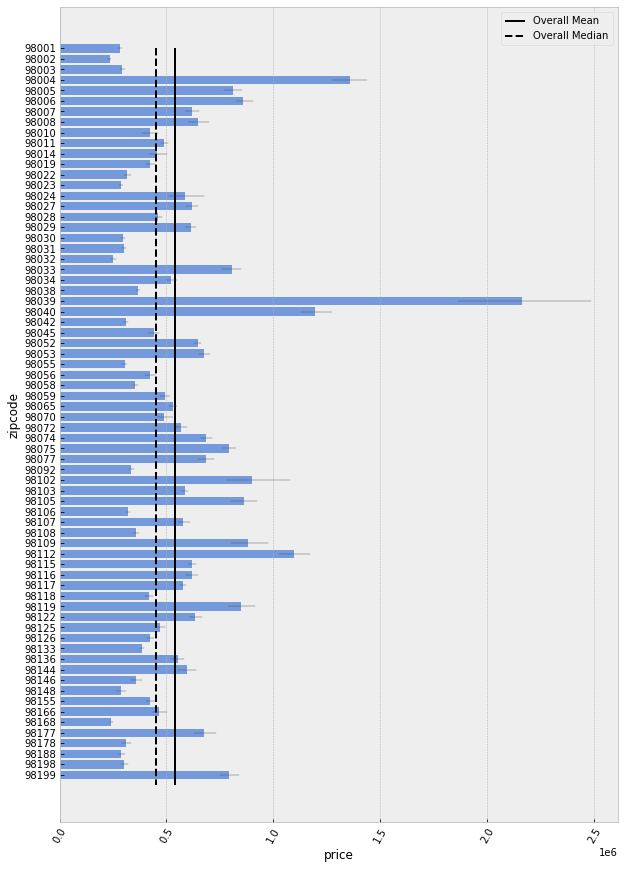

In [23]:
fig = plt.figure(figsize=(10,15))
sns.barplot(data=df, y='zipcode', x='price', orient='h', color='cornflowerblue', errwidth=.4)
plt.xticks(rotation=60)
plt.vlines(x=df['price'].mean(), ymin=0, ymax=70, color='black', label='Overall Mean')
plt.vlines(x=df['price'].median(), ymin=0, ymax=70, color='black', linestyles='dashed', label='Overall Median')
plt.legend();

In [24]:
# Removed the vastly more expensive zipcode from dataset
df = df[df['zipcode'] != 98039]

In [63]:
df2 = df.drop(columns=['age_at_sale', 'renovated?', 'yrs_since_renovated'])
df2

id  date_sold     price bedrooms bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0        3      1.00         1180   
1      6414100192 2014-12-09  538000.0        3      2.25         2570   
2      5631500400 2015-02-25  180000.0        2      1.00          770   
3      2487200875 2014-12-09  604000.0        4      3.00         1960   
4      1954400510 2015-02-18  510000.0        3      2.00         1680   
...           ...        ...       ...      ...       ...          ...   
21592   263000018 2014-05-21  360000.0        3      2.50         1530   
21593  6600060120 2015-02-23  400000.0        4      2.50         2310   
21594  1523300141 2014-06-23  402101.0        2      0.75         1020   
21595   291310100 2015-01-16  400000.0        3      2.50         1600   
21596  1523300157 2014-10-15  325000.0        2      0.75         1020   

       sqft_lot floors waterfront view  ... sqft_above sqft_basement  \
0          5650    1.0         No    0  ...       1180           0.0   
1          7242    2.0         No    0  ...       2170         400.0   
2         10000    1.0         No    0  ...        770           0.0   
3          5000    1.0         No    0  ...       1050         910.0   
4          8080    1.0         No    0  ...       1680           0.0   
...         ...    ...        ...  ...  ...        ...           ...   
21592      1131    3.0         No    0  ...       1530           0.0   
21593      5813    2.0         No    0  ...       2310           0.0   
21594      1350    2.0         No    0  ...       1020           0.0   
21595      2388    2.0         No    0  ...       1600           0.0   
21596      1076    2.0         No    0  ...       1020           0.0   

       yr_built  yr_renovated  zipcode      lat     long  \
0          1955           0.0    98178  47.5112 -122.257   
1          1951        1991.0    98125  47.7210 -122.319   
2          1933           0.0    98028  47.7379 -122.233   
3          1965           0.0    98136  47.5208 -122.393   
4          1987           0.0    98074  47.6168 -122.045   
...         ...           ...      ...      ...      ...   
21592      2009           0.0    98103  47.6993 -122.346   
21593      2014           0.0    98146  47.5107 -122.362   
21594      2009           0.0    98144  47.5944 -122.299   
21595      2004           0.0    98027  47.5345 -122.069   
21596      2008           0.0    98144  47.5941 -122.299   

       neighboring_sqft_living  neighboring_sqft_lot  year_sold  
0                         1340                  5650       2014  
1                         1690                  7639       2014  
2                         2720                  8062       2015  
3                         1360                  5000       2014  
4                         1800                  7503       2015  
...                        ...                   ...        ...  
21592                     1530                  1509       2014  
21593                     1830                  7200       2015  
21594                     1020                  2007       2014  
21595                     1410                  1287       2015  
21596                     1020                  1357       2014  

[21546 rows x 22 columns]

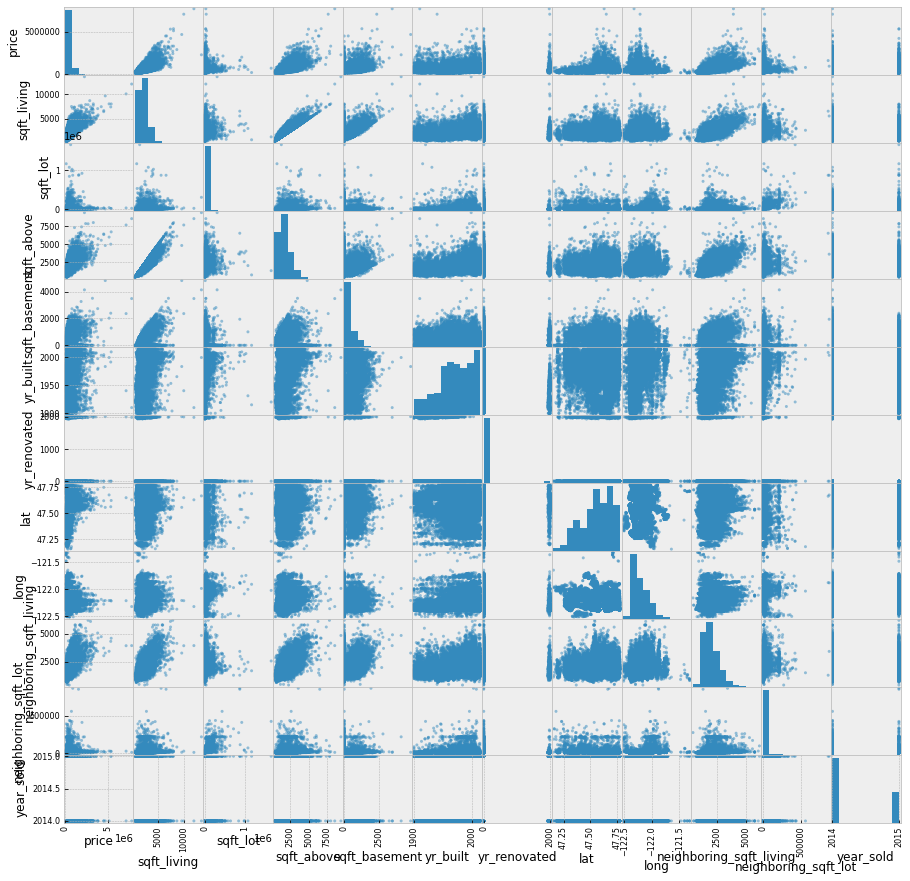

In [64]:
pd.plotting.scatter_matrix(df2, figsize=(15,15));

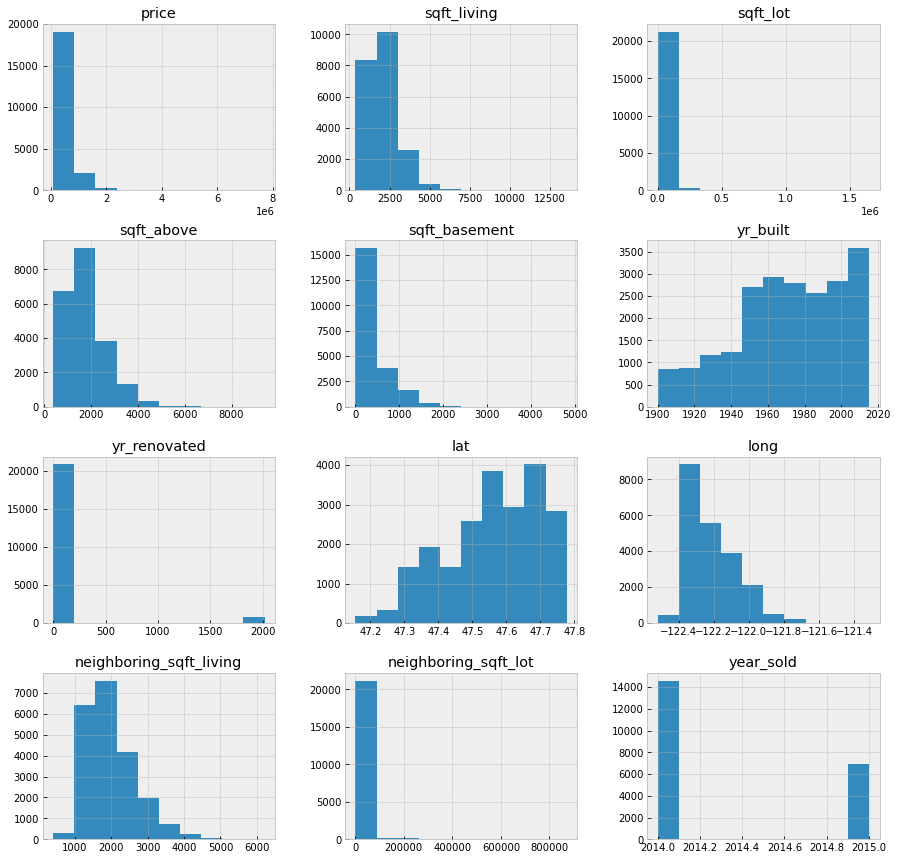

In [68]:
pd.plotting.hist_frame(df2, figsize=(15,15));

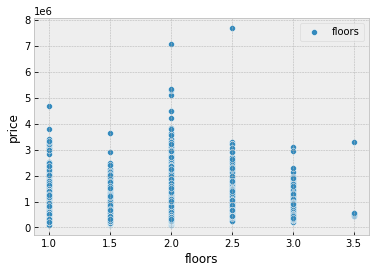

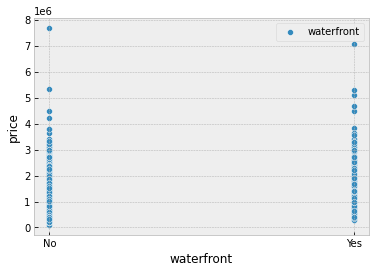

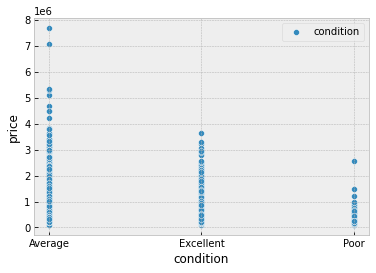

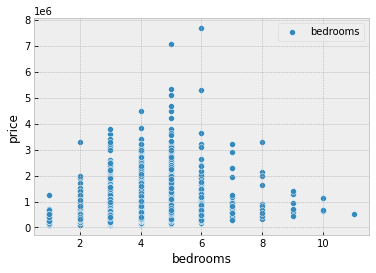

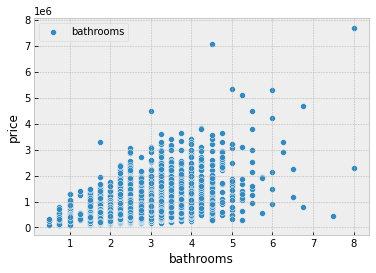

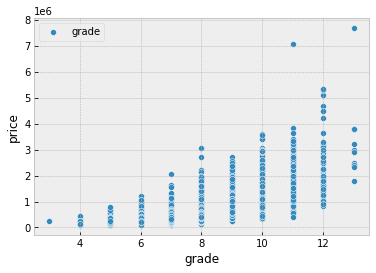

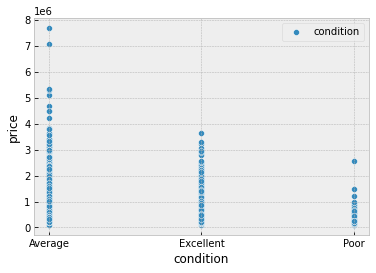

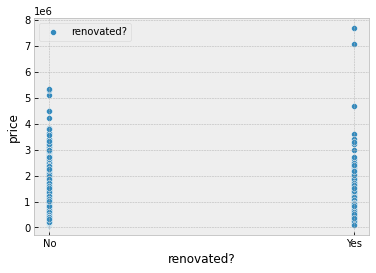

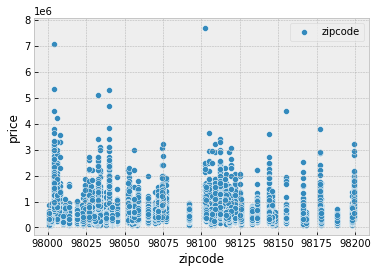

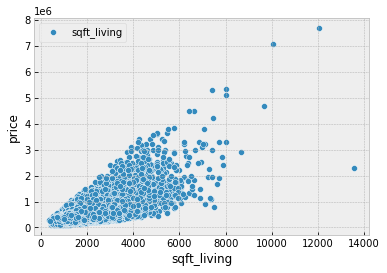

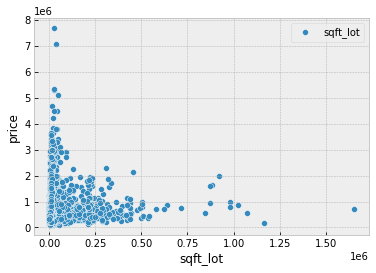

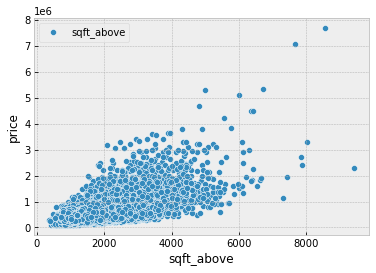

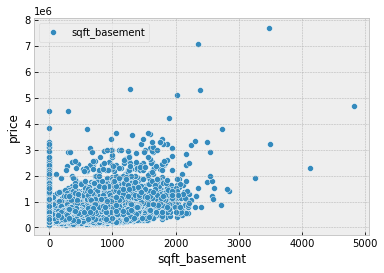

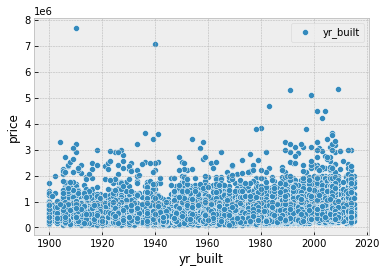

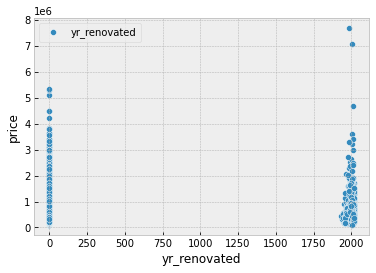

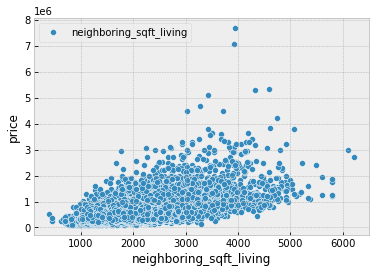

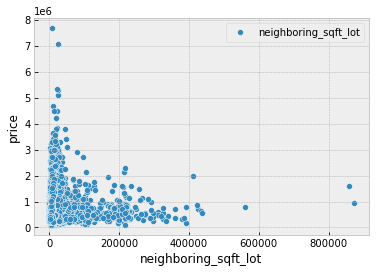

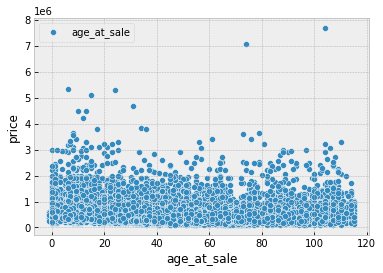

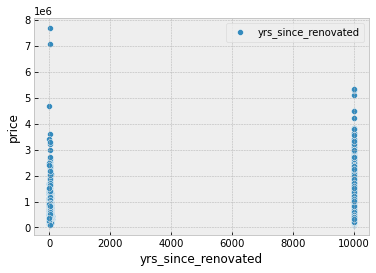

In [25]:
for pred in predictors:
    sns.scatterplot(data=df, x=pred, y=target, label=pred)
    plt.show()

(1930.0, 2017.0)

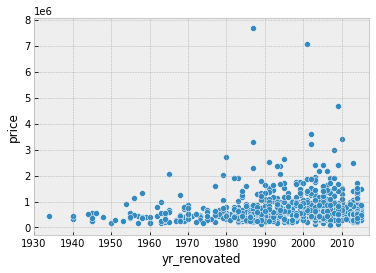

In [26]:
sns.scatterplot(data=df, x='yr_renovated', y='price')
plt.xlim(left=1930, right=2017)

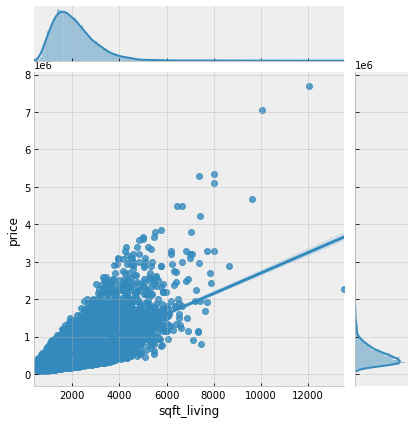

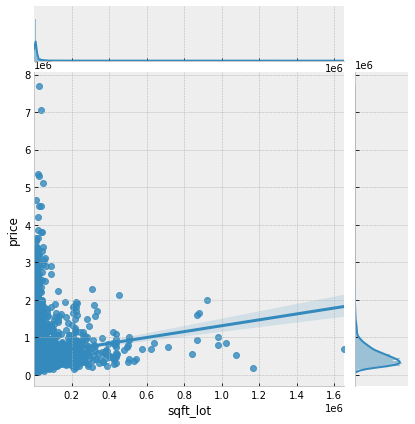

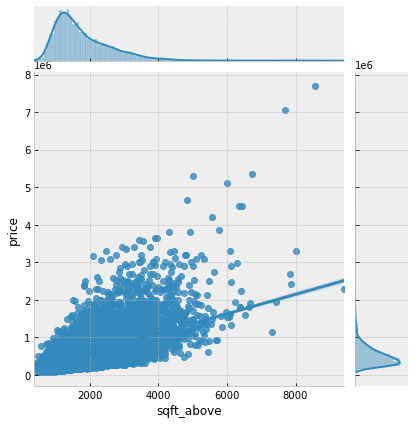

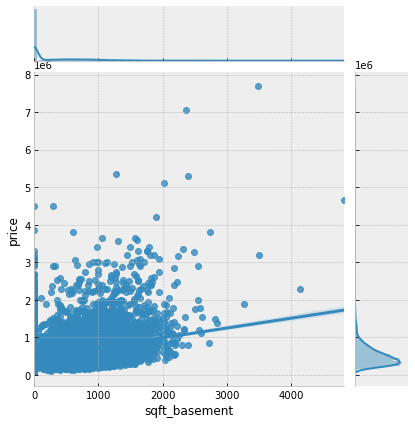

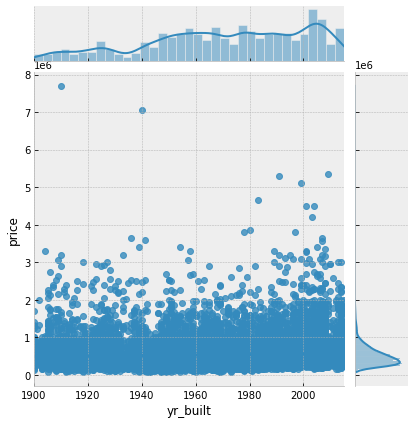

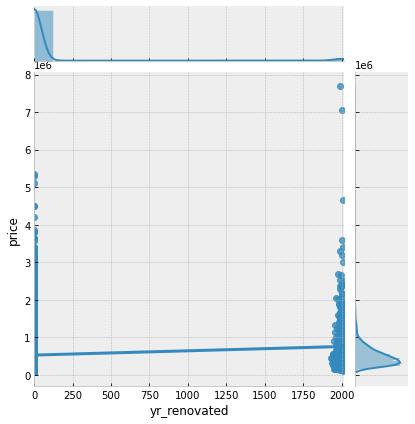

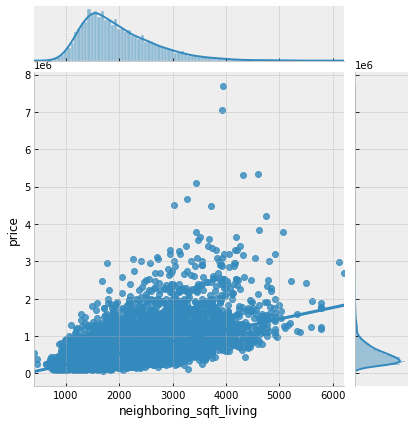

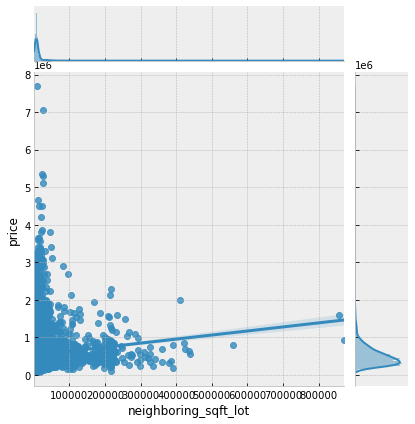

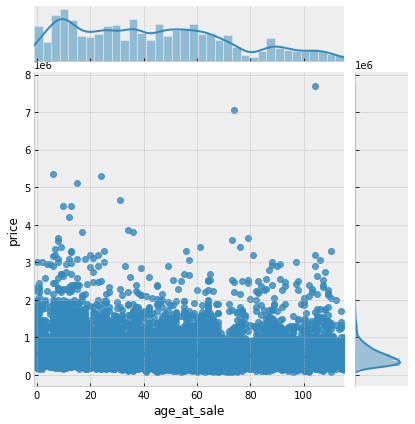

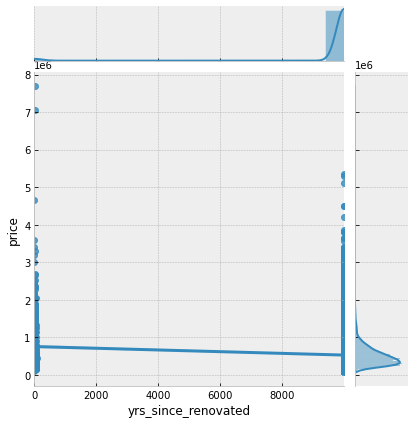

In [51]:
for pred in predictors_contin:
    sns.jointplot(data=df, x=pred, y='price', kind='reg')    
    plt.show()

<AxesSubplot:xlabel='yrs_since_renovated', ylabel='Count'>

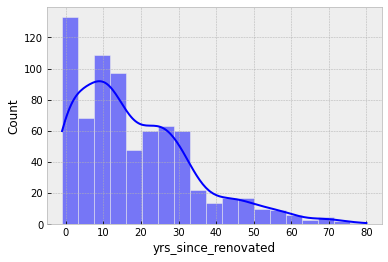

In [29]:
sns.histplot(x=df_renovated['yrs_since_renovated'], kde=True)


In [30]:
def multicollinearity(data, min_correlation=0.75, figsize=(12,12), annot=True):
    import seaborn as sns
    
    df = data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df['pairs'] = list(zip(df.level_0, df.level_1))
    df = df.set_index('pairs').drop(columns=['level_0', 'level_1'])
    df.columns = ['correlation']
    df.drop_duplicates(inplace=True)
    
    mask = np.triu(np.ones_like(data.corr(), dtype=bool))
    cmap = sns.diverging_palette(240, 0, sep=60, s=75, as_cmap=True)
    f, ax = plt.subplots(figsize=figsize)
    sns.heatmap(data.corr().abs(), center=0, linewidths=.3, mask=mask, annot=annot, cmap=cmap)
    return df[df.correlation > min_correlation] #looking for variables with corr coeff > .75


['floors', 'waterfront', 'condition', 'bedrooms', 'bathrooms', 'grade', 'condition', 'renovated?', 'zipcode', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'neighboring_sqft_living', 'neighboring_sqft_lot', 'age_at_sale', 'yrs_since_renovated']


correlation
pairs                                              
(price, price)                             1.000000
(yrs_since_renovated, renovated?_Yes)      0.999999
(yr_renovated, yrs_since_renovated)        0.999980
(renovated?_Yes, yr_renovated)             0.999968
(yr_built, age_at_sale)                    0.999873
(sqft_living, sqft_above)                  0.876448
(sqft_living, neighboring_sqft_living)     0.756400

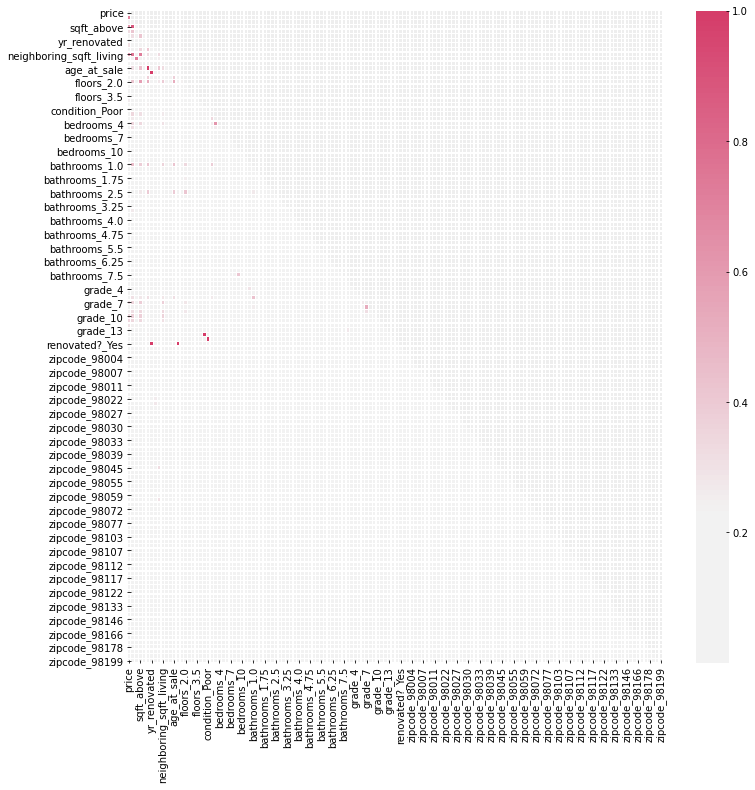

In [31]:
print(predictors)
multicollinearity(df_ohe, annot=False)

In [46]:
# Dropping one feature per correlated pair: yr_renovated, renovated?, yr_built, sqft_living, 
m1_predictors_cat = ['floors', 'waterfront', 'condition', 'bedrooms', 'bathrooms', 'grade', 
                  'condition']
m1_predictors_contin = ['sqft_lot',
                     'sqft_above', 'sqft_basement', 
                     'neighboring_sqft_living', 'neighboring_sqft_lot',
                     'age_at_sale', 'yrs_since_renovated']
m1_predictors = m1_predictors_cat + m1_predictors_contin

In [40]:
m1_ohe = pd.get_dummies(df[m1_predictors_cat], prefix=m1_predictors_cat, drop_first=True) 
m1_df_ohe = pd.concat([df[m1_predictors].drop(columns=m1_predictors_cat), m1_ohe, df['price']], axis=1)

correlation
pairs                            
(sqft_lot, sqft_lot)          1.0

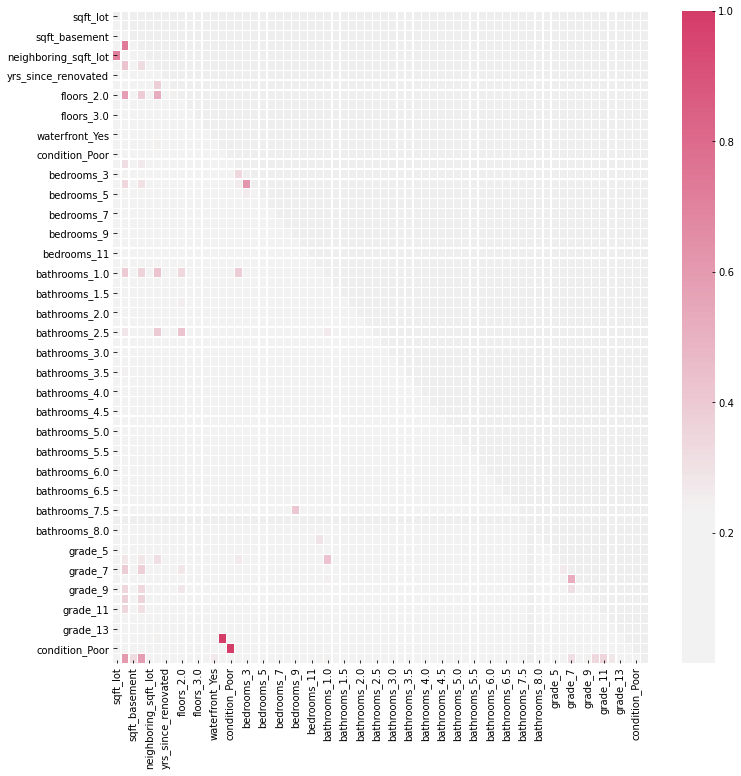

In [41]:
multicollinearity(m1_df_ohe, annot=False)

# Model

* Define a threshold for success
* Select machine learning algorithms to test on the project
* Tune the models that show promise to try and increase your results

In [48]:
formula_predictors1 = ' + '.join(m1_predictors_contin)
formula1 = target + ' ~ ' + formula_predictors1
model1 = ols(formula=formula, data=m1_df_ohe).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     3596.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:55:34   Log-Likelihood:            -2.9759e+05
No. Observations:               21546   AIC:                         5.952e+05
Df Residuals:                   21538   BIC:                         5.953e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1.755e+05   1.21e+04    -14.504      0.000   -1.99e+05   -1.52e+05
sqft_lot                    0.0568      0.057      0.993      0.321      -0.055       0.169
sqft_above                248.8416      3.208     77.570      0.000     242.554     255.129
sqft_basement             234.6849      4.046     58.000      0.000     226.754     242.616
neighboring_sqft_living    96.0811      3.791     25.348      0.000      88.651     103.511
neighboring_sqft_lot       -0.7620      0.087     -8.752      0.000      -0.933      -0.591
age_at_sale              2456.1759     64.028     38.361      0.000    2330.677    2581.675
yrs_since_renovated        -9.0412      0.934     -9.684      0.000     -10.871      -7.211
==============================================================================
Omnibus:                    14809.951   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           595324.296
Skew:                           2.800   Prob(JB):                         0.00
Kurtosis:                      28.135   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
# Pick different predictors for model 2, change some previous cat columns to contin
m2_predictors = ['yr_built', 'bedrooms', 'bathrooms', 
                 'floors', 'sqft_living', 'neighboring_sqft_living']
m2_df = df[[target] + m2_predictors]
m2_df[['bedrooms', 'floors']] = m2_df[['bedrooms', 'floors']].astype(int)
m2_df['bathrooms'] = m2_df['bathrooms'].astype(float)
m2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21546 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    21546 non-null  float64
 1   yr_built                 21546 non-null  int64  
 2   bedrooms                 21546 non-null  int64  
 3   bathrooms                21546 non-null  float64
 4   floors                   21546 non-null  int64  
 5   sqft_living              21546 non-null  int64  
 6   neighboring_sqft_living  21546 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.9 MB


/Users/kristincooper/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-97-548a4958114a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2_df['bathrooms'] = m2_df['bathrooms'].astype(float)


In [88]:
# Normalize the data
for col in m2_predictors:
    m2_df[col] = (m2_df[col] - m2_df[col].mean()) / m2_df[col].std()
m2_df

<ipython-input-88-77305a5a8464>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2_df[col] = (m2_df[col] - m2_df[col].mean()) / m2_df[col].std()


price  yr_built  bedrooms  bathrooms    floors  sqft_living  \
0      221900.0 -0.544418 -0.409749  -1.454678 -0.807863    -0.983317   
1      538000.0 -0.680545 -0.409749   0.178577  1.004529     0.541545   
2      180000.0 -1.293120 -1.516486  -1.454678 -0.807863    -1.433097   
3      604000.0 -0.204098  0.696989   1.158530 -0.807863    -0.127639   
4      510000.0  0.544604 -0.409749  -0.148074 -0.807863    -0.434806   
...         ...       ...       ...        ...       ...          ...   
21592  360000.0  1.293307 -0.409749   0.505228  2.816920    -0.599359   
21593  400000.0  1.463466  0.696989   0.505228  1.004529     0.256319   
21594  402101.0  1.293307 -1.516486  -1.781329  1.004529    -1.158841   
21595  400000.0  1.123147 -0.409749   0.505228  1.004529    -0.522568   
21596  325000.0  1.259275 -1.516486  -1.781329  1.004529    -1.158841   

       neighboring_sqft_living  
0                    -0.942917  
1                    -0.430456  
2                     1.077643  
3                    -0.913633  
4                    -0.269397  
...                        ...  
21592                -0.664724  
21593                -0.225472  
21594                -1.411452  
21595                -0.840424  
21596                -1.411452  

[21546 rows x 7 columns]

In [89]:
formula_predictors2 = " + ".join(m2_predictors)
formula = target + '~' + formula_predictors2
model2 = ols(formula=formula, data=m2_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     4709.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:42:06   Log-Likelihood:            -2.9690e+05
No. Observations:               21546   AIC:                         5.938e+05
Df Residuals:                   21539   BIC:                         5.939e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                5.365e+05   1591.144    337.198      0.000    5.33e+05     5.4e+05
yr_built                -1.096e+05   2076.653    -52.795      0.000   -1.14e+05   -1.06e+05
bedrooms                -5.909e+04   2029.303    -29.121      0.000   -6.31e+04   -5.51e+04
bathrooms                5.474e+04   2829.373     19.346      0.000    4.92e+04    6.03e+04
floors                   3.428e+04   2073.838     16.529      0.000    3.02e+04    3.83e+04
sqft_living              2.181e+05   3263.862     66.835      0.000    2.12e+05    2.25e+05
neighboring_sqft_living  6.192e+04   2471.745     25.052      0.000    5.71e+04    6.68e+04
==============================================================================
Omnibus:                    14865.610   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           637538.491
Skew:                           2.793   Prob(JB):                         0.00
Kurtosis:                      29.057   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

correlation
pairs                                              
(price, price)                             1.000000
(neighboring_sqft_living, sqft_living)     0.756860
(sqft_living, bathrooms)                   0.753482

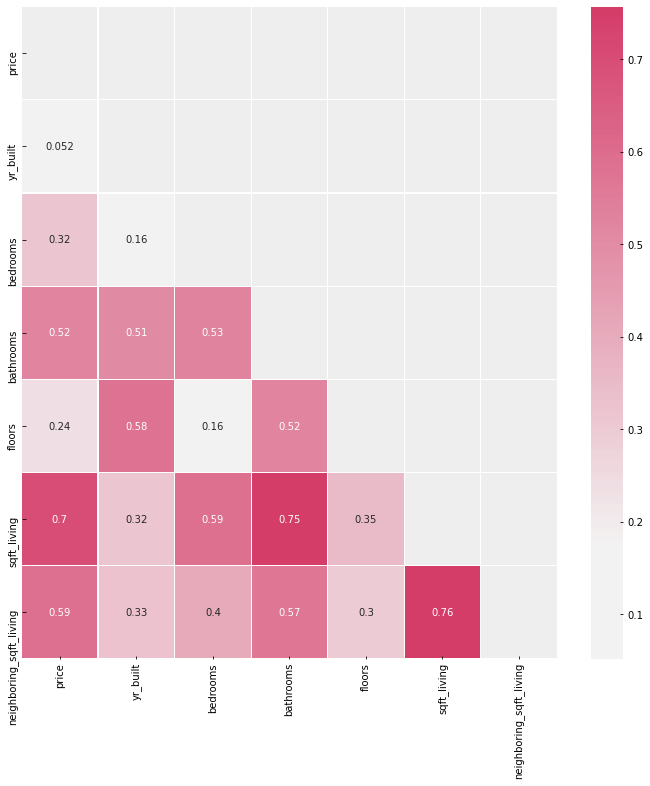

In [90]:
multicollinearity(m2_df)

In [102]:
m3_predictors = ['yr_built', 'bedrooms', 'bathrooms', 'floors', 'neighboring_sqft_living']

In [103]:
formula_predictors3 = " + ".join(m3_predictors)
formula3 = target + '~' + formula_predictors3
model3 = ols(formula=formula3, data=m2_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     3940.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:49:07   Log-Likelihood:            -2.9893e+05
No. Observations:               21546   AIC:                         5.979e+05
Df Residuals:                   21540   BIC:                         5.979e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                8.267e+06   1.48e+05     55.941      0.000    7.98e+06    8.56e+06
yr_built                -4386.6567     76.903    -57.042      0.000   -4537.392   -4235.922
bedrooms                 -1.83e+04   2343.107     -7.809      0.000   -2.29e+04   -1.37e+04
bathrooms                 1.93e+05   3536.919     54.576      0.000    1.86e+05       2e+05
floors                    6.76e+04   4128.928     16.372      0.000    5.95e+04    7.57e+04
neighboring_sqft_living   237.7418      3.157     75.306      0.000     231.554     243.930
==============================================================================
Omnibus:                    18349.672   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1421284.699
Skew:                           3.673   Prob(JB):                         0.00
Kurtosis:                      42.105   Cond. No.                     2.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
m2_df['floors'].value_counts()

1    12560
2     8368
3      618
Name: floors, dtype: int64

# Interpret

* Define recommendations
* Create/select supporting visuals to communicate to stakeholders

# Appendix

In [35]:
# Attempting to get markers and popups on the map; can't get it to work

# code source: https://www.kaggle.com/saidakbarp/nyc-property-sales-eda-map-analysis/notebook#Map-analysis

# from folium.plugins import MarkerCluster
# marker_cluster = MarkerCluster().add_to(kc_zipmap)
# for i in zipcodes_df.iterrows():
#     folium.Marker(location=[zipcodes_df['lat'][i], zipcodes_df['long'][i]], 
#                   popup=zipcodes_df['zipcode'][i],
#                   tooltip="""Mean home price: <b>${}</b> <br>
#                            Mean sq footage (living): <b>{}</b> <br>
#                            Mean year built: <b>{}</b>""".format(zipcodes_df['price'][i], 
#                                                                 zipcodes_df['sqft_living'][i], 
#                                                                 zipcodes_df['yr_built'][i])).add_to(kc_zipmap)
    
#     from folium.plugins import MarkerCluster
#     marker_cluster = MarkerCluster() 
#     for i in range(len(data)):
#         location = [data['lat'][i],data['long'][i]]
#         tooltip = "Zipcode:{}<br> Click for more".format(data[zips][i])
#         folium.Marker(location, 
#                       popup="""<i>Mean home price: </i> <br> <b>${}</b> <br>
#                       <i>Mean square footage (living): </i><b><br>{}</b><br>
#                       <i>Mean year built: </i><b><br>{}</b><br>""".format(data['price'][i], 
#                                                                           data['sqft_living'][i], 
#                                                                           data['yr_built'][i]), 
#                       tooltip=tooltip).add_to(marker_cluster)
#     marker_cluster.add_to(m)